In [5]:
%matplotlib inline

from skimage import io, segmentation
import numpy as np
import os
import matplotlib.pyplot as plt
# implementation in helper
from slic import slic
# 'custom' distance + 
from custom import generate_feature, get_yx, calculate_distance
# metrics
from metrics import RecallThickened, UnderSegmentation

In [2]:
# params 3-5
images = ['Images/Q3/castle.jpg', 'Images/Q3/castle2.jpg']
max_iter = 10

In [7]:
if __name__ == '__main__':
    # weights
    weights = [10, 100, 270]
    k = 16

    for weight in weights:
        for ima in images:
            image = io.imread(ima)
            nearest_centers, distance_start, distance_end = slic(image, \
                                                               k, \
                                                               max_iter, \
                                                               weight, \
                                                               generate_feature, \
                                                               calculate_distance, \
                                                               get_yx)

            marked = segmentation.mark_boundaries(image, nearest_centers, mode='outer')

            fn = 'Q3/' + ima.split('/')[-1]
            fn += '_' + str(weight)+ '.png'
            io.imsave(fn, marked)

/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/Users/jhh11/.virtualenvs/cv/lib/python2.7/site-packages/skimage/util/dtype.py:111: UserWarning: Possible precision loss when converting from float64 to uint8
  "%s to %s" % (dtypeobj_in, dtypeobj))


centers 15
centers 15
centers 15
centers 15
centers 15
centers 15


centers 15
centers 15


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


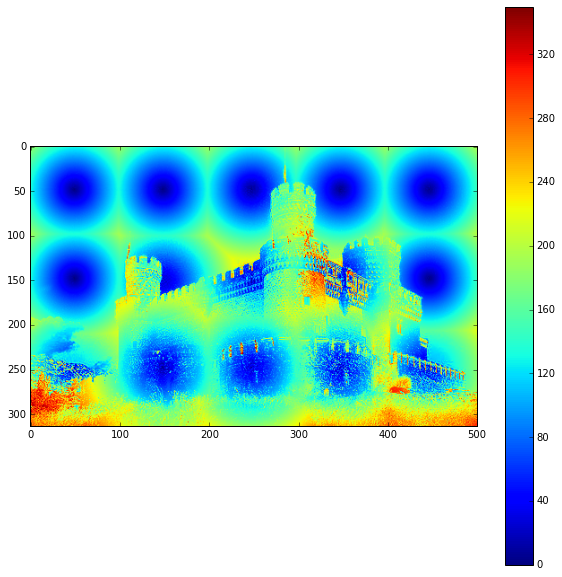

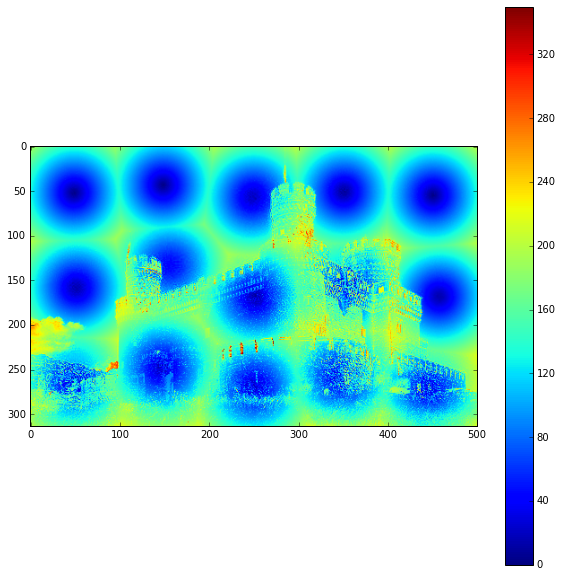

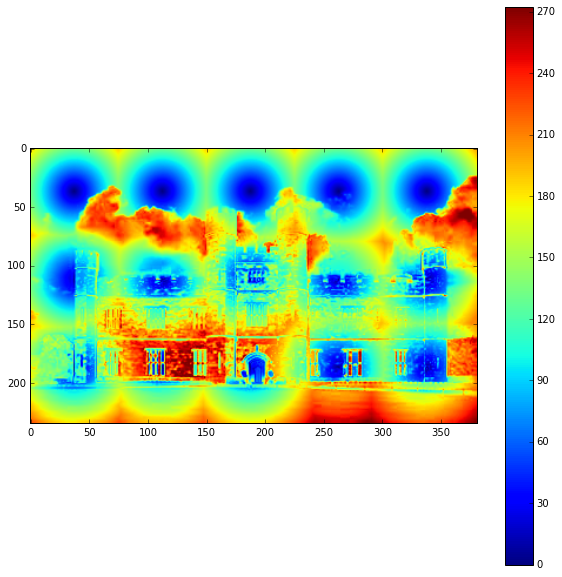

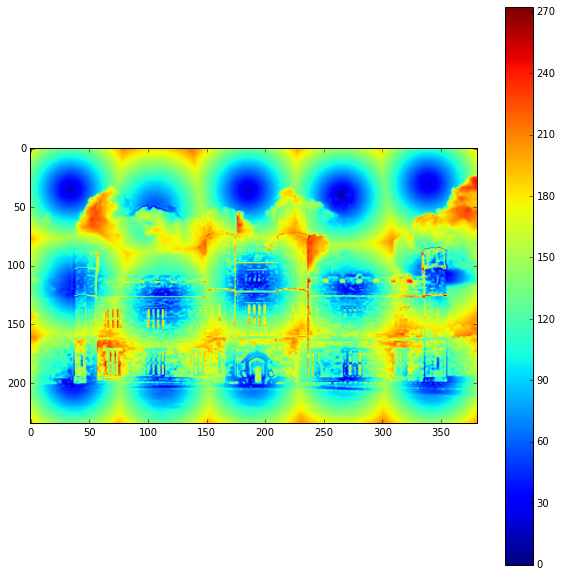

In [14]:
if __name__ == '__main__':
    # distances
    weight = 270
    k = 16

    for ima in images:
        image = io.imread(ima)
        nearest_centers, distance_start, distance_end = slic(image, \
                                                               k, \
                                                               max_iter, \
                                                               weight, \
                                                               generate_feature, \
                                                               calculate_distance, \
                                                               get_yx)

        fn = 'Q3/' + ima.split('/')[-1]
        fn1 = fn + '_distance_start.png'
        fn2 = fn + '_distance_end.png'

        min_dist = min(np.min(distance_start), np.min(distance_end))
        max_dist = min(np.max(distance_start), np.max(distance_end))

        fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
        heatmap = ax.imshow(distance_start, vmin=min_dist, vmax=max_dist)
        fig.colorbar(heatmap)
        plt.savefig(fn1)

        fig2, ax2 = plt.subplots(ncols=1, nrows=1, figsize=(10, 10))
        heatmap2 = ax2.imshow(distance_end, vmin=min_dist, vmax=max_dist)
        fig2.colorbar(heatmap2)
        plt.savefig(fn2)

In [15]:
if __name__ == '__main__':
    # ks
    weight = 270
    kks = [16, 64, 256, 1024]

    for kk in kks:
        for ima in images:
            image = io.imread(ima)
            %time nearest_centers, distance_start, distance_end = slic(image, \
                                                               kk, \
                                                               max_iter, \
                                                               weight, \
                                                               generate_feature, \
                                                               calculate_distance, \
                                                               get_yx)

            marked = segmentation.mark_boundaries(image, nearest_centers, mode='outer')

            fn = 'Q3/' + ima.split('/')[-1]
            fn += '_k' + str(kk)+ '.png'
            io.imsave(fn, marked)

centers 15
CPU times: user 1min 57s, sys: 1.29 s, total: 1min 59s
Wall time: 2min 3s
centers 15
CPU times: user 1min 2s, sys: 605 ms, total: 1min 3s
Wall time: 1min 4s
centers 60
CPU times: user 2min 4s, sys: 1.21 s, total: 2min 5s
Wall time: 2min 8s
centers 60
CPU times: user 1min 12s, sys: 752 ms, total: 1min 12s
Wall time: 1min 15s
centers 260
CPU times: user 2min 34s, sys: 1.7 s, total: 2min 36s
Wall time: 2min 43s
centers 240
CPU times: user 1min 22s, sys: 756 ms, total: 1min 23s
Wall time: 1min 25s
centers 1092
CPU times: user 2min 52s, sys: 2.72 s, total: 2min 55s
Wall time: 3min 10s
centers 1092
CPU times: user 1min 42s, sys: 1.75 s, total: 1min 43s
Wall time: 1min 54s


/usr/local/lib/python2.7/site-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


In [26]:
if __name__ == '__main__':
    weight = 270
#     kks = [16, 64, 100, 256]
    kks = [16]
    images = ['Images/Q3/castle.jpg']
    
    for kk in kks:
        for ima in images:
            image = io.imread(ima)
            %time nearest_centers, distance_start, distance_end = slic(image, \
                                                               kk, \
                                                               max_iter, \
                                                               weight, \
                                                               generate_feature, \
                                                               calculate_distance, \
                                                               get_yx)
            bounds = segmentation.find_boundaries(nearest_centers, mode='outer').astype(int)

            io.imsave('test.tif', nearest_centers)
            io.imsave('test2.tif', bounds)

centers 15
CPU times: user 2min 10s, sys: 2.12 s, total: 2min 12s
Wall time: 2min 27s
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
[0 1]


/Users/jhh11/.virtualenvs/cv/lib/python2.7/site-packages/skimage/io/_io.py:159: UserWarning: test2.tif is a low contrast image
  warnings.warn('%s is a low contrast image' % fname)


In [28]:
GT = io.imread('test.tif').astype(int)
GT2 = io.imread('test2.tif').astype(int)

In [29]:
print np.unique(GT)
print len(np.unique(GT))

print np.unique(GT2)
print len(np.unique(GT2))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]
15
[0 1]
2


In [157]:
# print nearest_centers
# io.imsave('test_segments.tif', nearest_centers)
GT_segments = io.imread('Images/Q3/BSDS/2018_s1.tif')
# print GT_segments
# print nearest_centers
print UnderSegmentation(nearest_centers, GT_segments)

0.181922396876


In [70]:
# print bounds
# io.imsave('test_bounds.bmp', bounds)
GT_edges = io.imread('Images/Q3/BSDS/2018_e1.bmp')
GT_edges = GT_edges/255
# print bounds
print RecallThickened(bounds, GT_edges)

2.010995484


In [9]:
GT = io.imread('Images/Q3/BSDS/15062_s5.tif').astype(int)
print np.unique(GT)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [156]:
s1 = np.array([[0, 0, 1, 1],
                [0, 2, 1, 1],
                [2, 2, 2, 1]])
s2 = np.array([[0, 1, 1, 0],
               [0, 1, 1, 0],
               [0, 1, 1, 1]])

UnderSegmentation(s1, s2)

0.6666666666666666